<a href="https://colab.research.google.com/github/Idan-Alter/OU-22961-Deep-Learning/blob/main/22961_4_2_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from tqdm import tqdm
import sklearn.datasets as skds
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:493: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


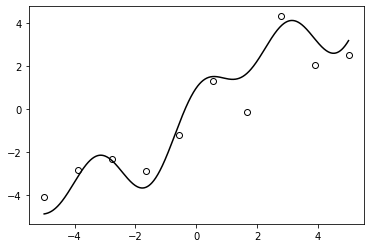

In [ ]:
fx = lambda x: torch.sin(x) + torch.cos(2*x) + x
X  = torch.linspace(-5, 5, 1000).resize(1000,1)
Y  = fx(X)

Xtrain = torch.linspace(-5, 5, 10).resize(10,1)
torch.manual_seed(1)
Ytrain = fx(Xtrain) + 1.2*torch.randn(size=Xtrain.size())

plt.plot(X, Y, color='black');
plt.scatter(Xtrain, Ytrain, color="white", edgecolor="black");

In [ ]:
model = nn.Sequential(nn.Linear(1,100),
                      nn.ReLU(),
                      nn.Linear(100,100),
                      nn.ReLU(),
                      nn.Linear(100,100),
                      nn.ReLU(),
                      nn.Linear(100,1)
                      )
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

def train_model(epochs):
  train_loss = torch.empty(epochs)
  test_loss  = torch.empty(epochs)
  for idx in tqdm(range(epochs)):
    optimizer.zero_grad()
    y_model  = model(Xtrain)
    MSE_loss = ((y_model - Ytrain)**2).mean()
    MSE_loss.backward()
    optimizer.step()
    with torch.no_grad():
      train_loss[idx] = MSE_loss
      test_loss[idx]  = ((model(X)-Y)**2).mean()  
  return (train_loss, test_loss)
  
def plot_loss(train_loss, test_loss):
  plt.semilogy(train_loss, label="Training Loss", color='red', linestyle="dashed", alpha=0.5)
  plt.semilogy(test_loss, label="Test Loss", color='black', alpha=0.5);
  plt.title("MSE Loss")
  plt.xlabel("Epoch")
  plt.legend()

def plot_regression():
  plt.plot(X, Y, color='black');
  plt.scatter(Xtrain, Ytrain, color="white", edgecolor="black")
  plt.plot(X,model(X).detach(), color='red', linestyle="dashed", linewidth=2);


In [ ]:
(train_loss, test_loss) = train_model(2000)

100%|██████████| 2000/2000 [00:13<00:00, 145.35it/s]


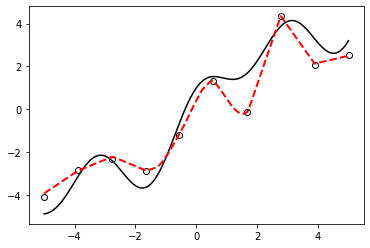

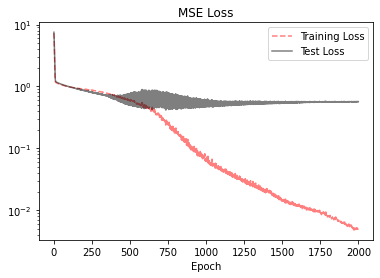

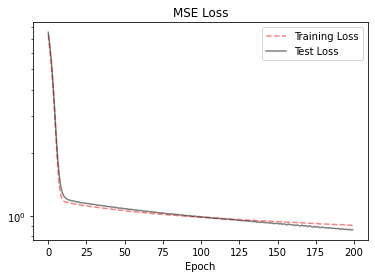

In [ ]:
plot_regression()
plt.show()
plot_loss(train_loss,test_loss)
plt.show()
plot_loss(train_loss[:200], test_loss[:200])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else n

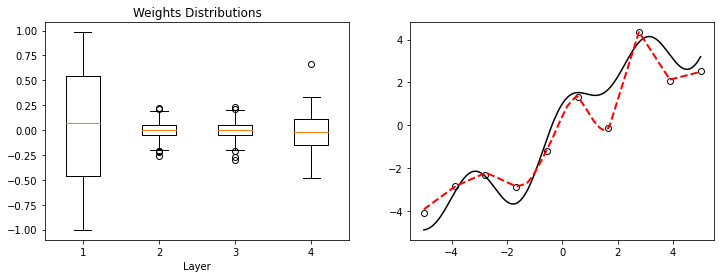

In [ ]:
weights = [param.detach() for (name, param) in model.named_parameters() if "weight" in name]
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.boxplot(weights);
plt.xlabel("Layer");
plt.title("Weights Distributions");
plt.subplot(1,2,2)
plot_regression()

#Early Stopping

100%|██████████| 500/500 [00:02<00:00, 182.11it/s]


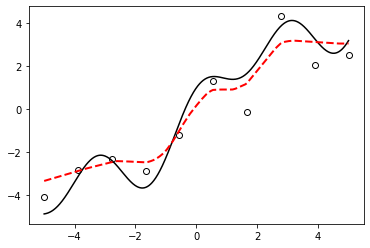

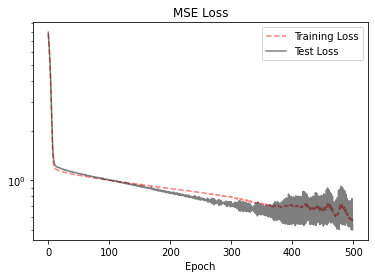

In [ ]:
for layer in model:
  if hasattr(layer, "reset_parameters"):
    layer.reset_parameters()
(train_loss, test_loss) = train_model(500)
plot_regression()
plt.show()
plot_loss(train_loss, test_loss)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else n

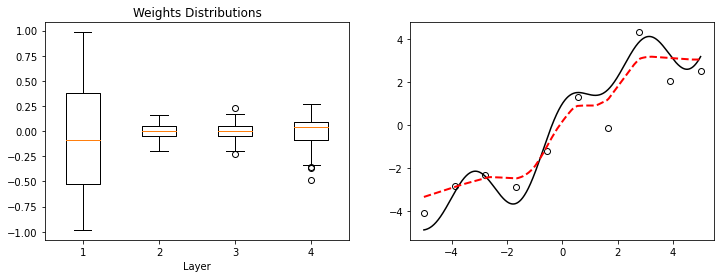

In [ ]:
weights = [param.detach() for (name, param) in model.named_parameters() if "weight" in name]
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.boxplot(weights);
plt.xlabel("Layer");
plt.title("Weights Distributions");
plt.subplot(1,2,2)
plot_regression()

#More Data

In [ ]:
n_samples = 10**4
Xtrain = torch.linspace(-5, 5, n_samples).resize(n_samples,1)
torch.manual_seed(1)
Ytrain = fx(Xtrain) + 1.2*torch.randn(size=Xtrain.size())

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:493: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [ ]:
def plot_regression_alpha():
  plt.plot(X, Y, color='black');
  plt.scatter(Xtrain, Ytrain, color="white", edgecolor="black", alpha=0.1)
  plt.plot(X, model(X).detach(), color='red', linestyle="dashed", linewidth=2);


In [ ]:
for layer in model:
  if hasattr(layer,"reset_parameters"):
    layer.reset_parameters()
(train_loss, test_loss) = train_model(3000)

100%|██████████| 3000/3000 [02:11<00:00, 22.88it/s]


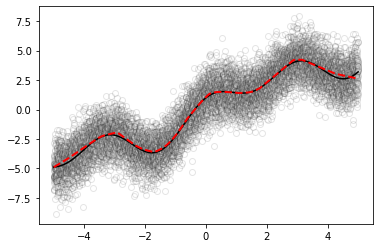

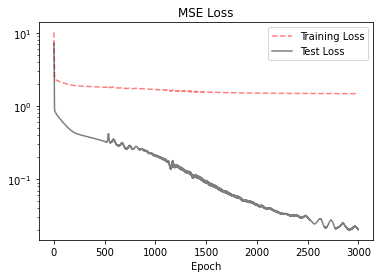

In [ ]:
plot_regression_alpha()
plt.show()
plot_loss(train_loss, test_loss)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else n

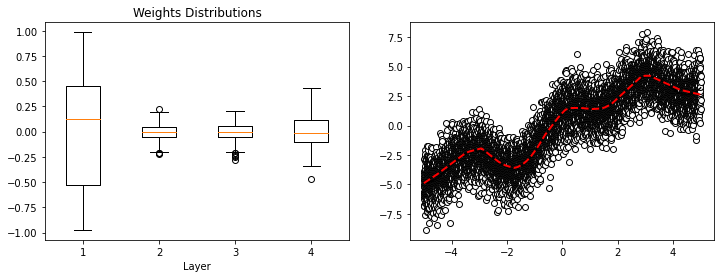

In [ ]:
weights = [param.detach() for (name, param) in model.named_parameters() if "weight" in name]
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.boxplot(weights);
plt.xlabel("Layer");
plt.title("Weights Distributions");
plt.subplot(1,2,2)
plot_regression()